In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [33]:
import matplotlib as mpl

In [34]:
def smoothing_fn(x): 
    return 0.5 * (np.cos(np.pi*x+np.pi) + 1)

In [35]:
x = np.linspace(0,1)

In [41]:
mpl.__version__

'3.9.2'

In [145]:
rcParams = {
    'text.usetex': True,
    'pgf.preamble': r'\usepackage{color}', 
    'font.size': 16
}


In [146]:
def plot_example_lambda(ratio):

    with mpl.rc_context(rcParams):
        
        # get associated lambda
        lam = smoothing_fn(ratio)

        #setup plot
        fig, ax = plt.subplots()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_ylabel('$\lambda_\mathrm{ML}$')
        ax.set_xlabel('$i_\mathrm{blend} / n_\mathrm{blend}$')

        # plot smoothing funciton
        ax.plot(x, smoothing_fn(x), color='k', zorder=1)

        # plot marker and hilight lines
        x_hi = [0, ratio, ratio]
        y_hi = [lam, lam, 0]
        ax.plot(x_hi, y_hi, color='red', linestyle='dotted')
        ax.scatter(ratio, lam, marker='*', color='red', s=100, zorder=2)
        return ax

<Axes: xlabel='$i_\\mathrm{blend} / n_\\mathrm{blend}$', ylabel='$\\lambda_\\mathrm{ML}$'>

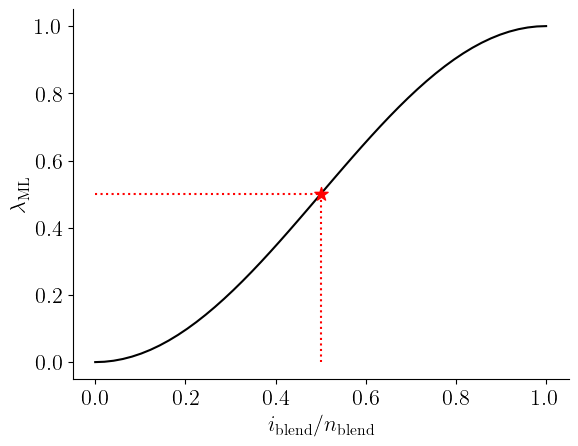

In [147]:
plot_example_lambda(0.5)

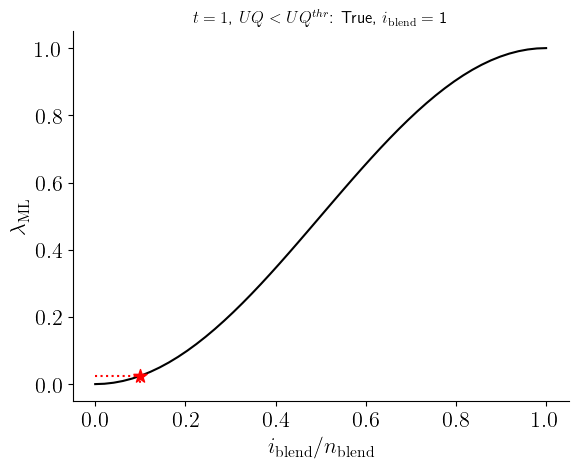

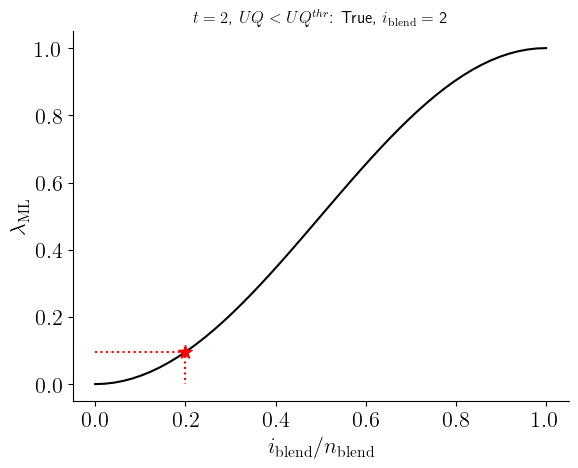

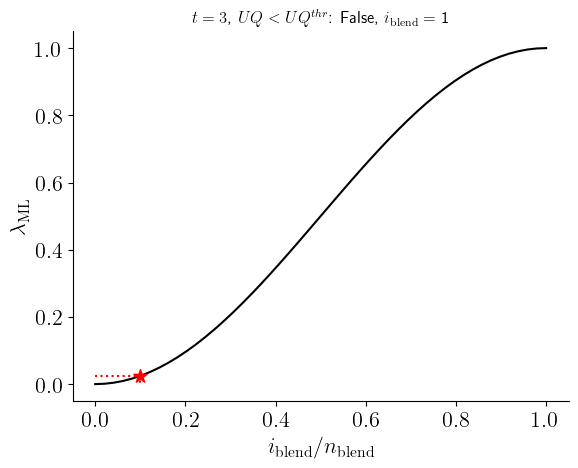

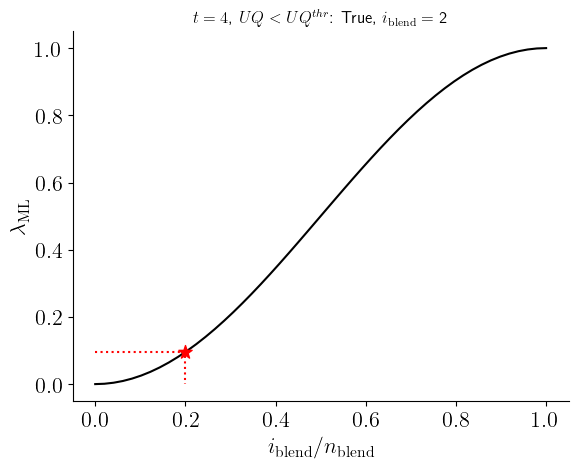

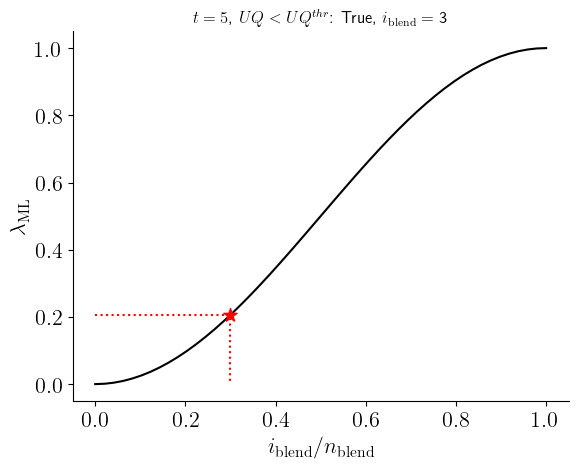

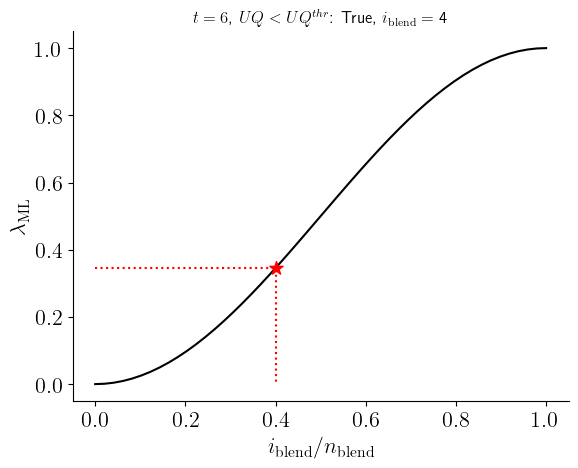

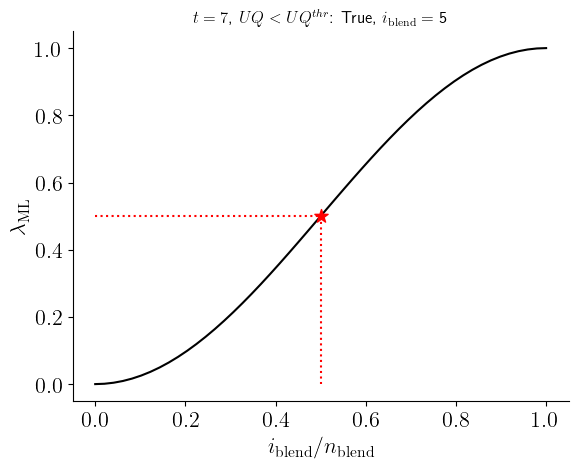

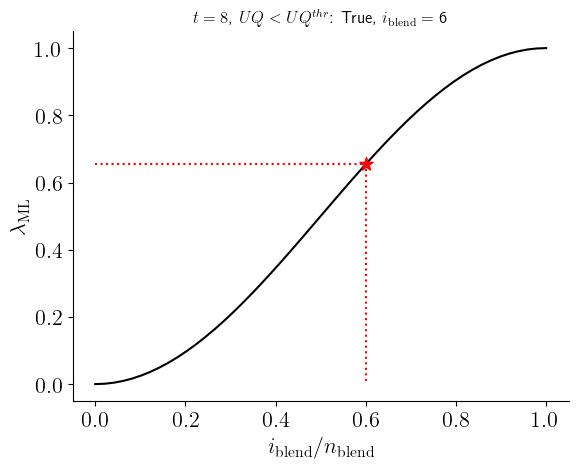

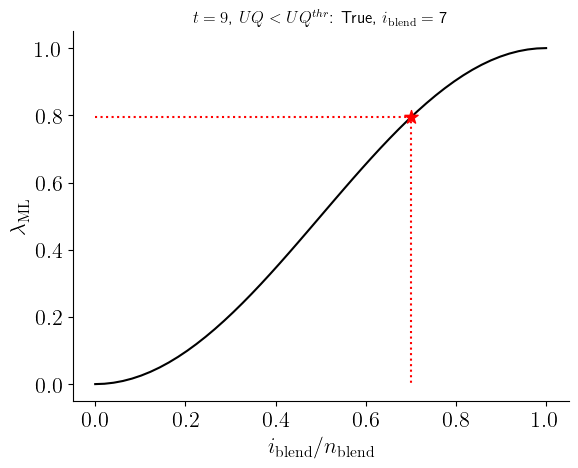

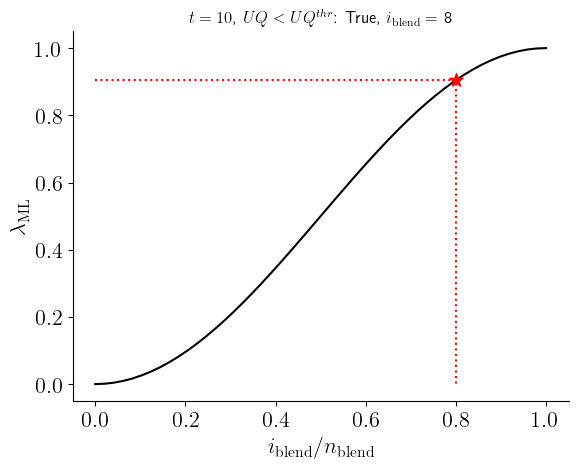

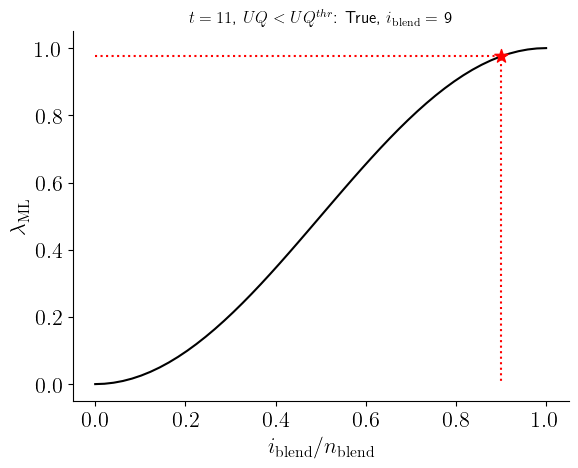

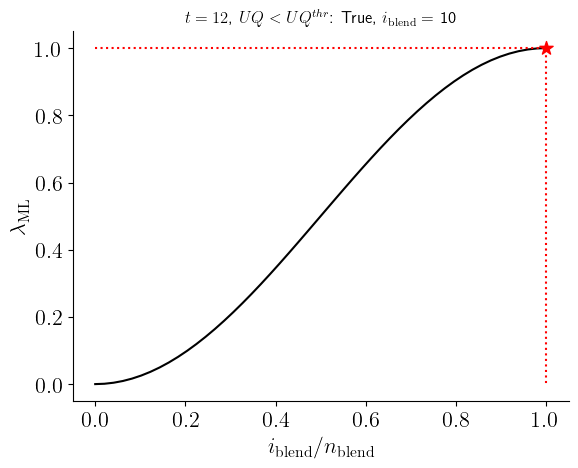

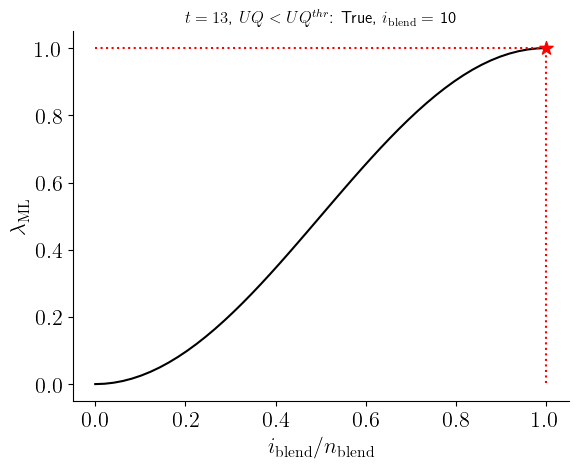

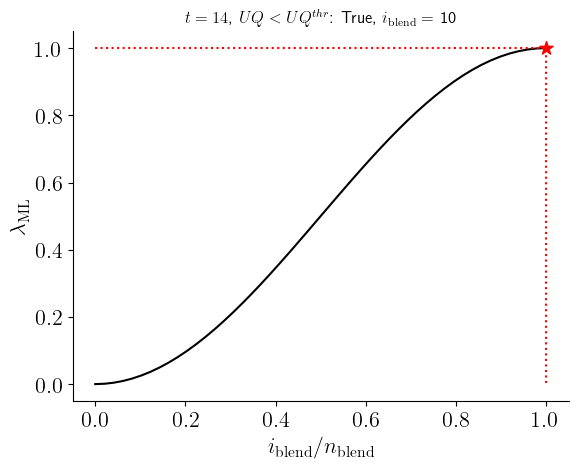

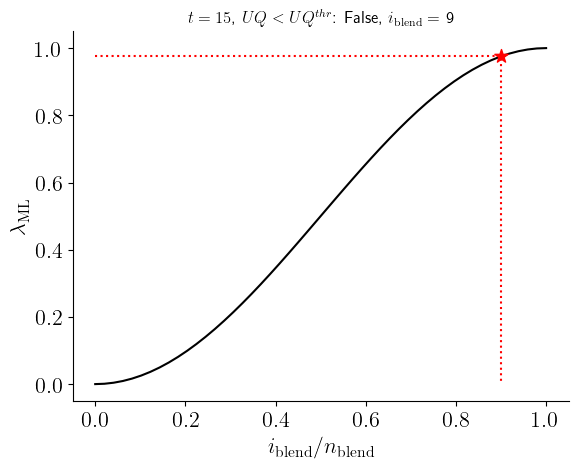

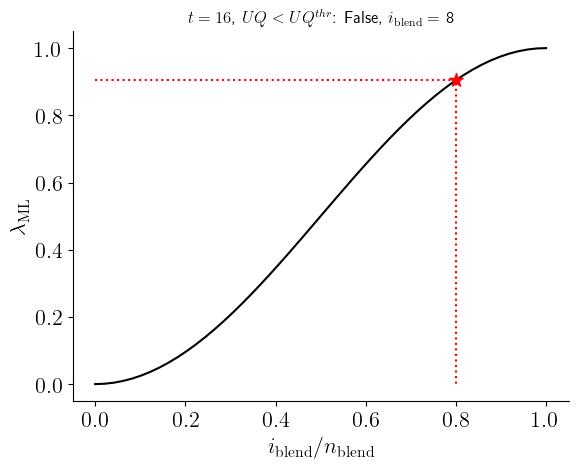

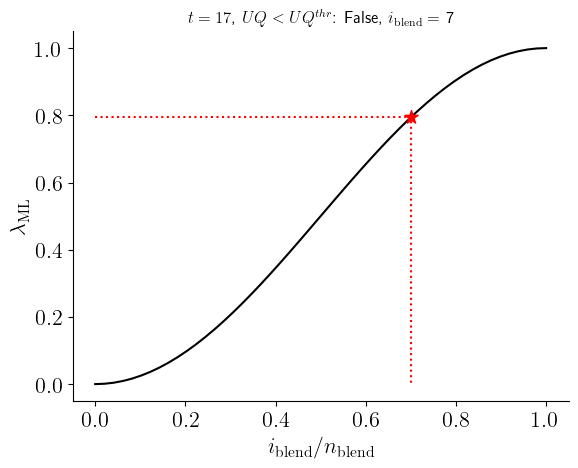

In [151]:
n_blend = 10
i_blend = 0
increment = [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1]
for t in range(len(increment)):
    i_blend += increment[t]
    i_blend = np.clip(i_blend, 0, n_blend)
    ax = plot_example_lambda(i_blend / n_blend)
    ax.set_title(f'$t = {t+1}$, $UQ < UQ^{{thr}}$: {increment[t] == 1}, $i_\mathrm{{blend}}$ = {i_blend}')
    plt.savefig(f'blending_example_{t}.png', dpi=500, bbox_inches='tight')